# Setup

In [27]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from experiments.irl.datasets import *
from experiments.irl.experiment_utils import *
from research.irl.fair_irl import *
from research.utils import *


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:2000px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

# Prevent long logging lines from wrapping
# display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))
np.set_printoptions(linewidth=np.inf)

exp_list = []

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run experiments

### Boston to Adult

In [28]:
base_exp_info = {
#     'EXPERIMENT_NAME': 'compas_48_hidden',
#     'EXPERIMENT_NAME': 'boston_to_adult_jan8_44',
    'EXPERIMENT_NAME': 'boston_to_adult_svm_6',
#     'EXPERIMENT_NAME': 'adult_to_boston_jan8_33',
#     'EXPERIMENT_NAME': 'COMPAS_to_boston_jan8_32',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
#         'FPRPar',
        'TNRPar',
#         'FNRPar',
        'PR_Z0',
        'PR_Z1',
        'NR_Z0',
        'NR_Z1',
        'TPR_Z0',
        'TPR_Z1',
        'TNR_Z0',
        'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
    
    # Expert demo parameters
#     'DATASET': 'ACSIncome__CA',
#     'TARGET_DATASET': 'ACSIncome__IL',
    
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': True,
    'USE_HIDDEN_FEATURES_TARGET': False,
    
    'N_EXPERT_DEMOS': 1,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 50_000,
    'MIN_FREQ_FILL_PCT': .3,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .01,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 3,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
        'HardtDemParNoisy',
        'HardtEqOppNoisy',
#         'HardtFPRNoisy',
#         'HardtTNRNoisy',
#         'Dummy',
#         'DummyNoisy',
    ],
}

base_exp_info['N_TRIALS'] = 10
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .000001
base_exp_info['IGNORE_RESULTS_EPSILON'] = .006
base_exp_info['MAX_ITER'] = 40
base_exp_info['ALLOW_NEG_WEIGHTS'] = True
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['EARLY_STOP_NO_NEW_BEST_ITERS'] = 15

source_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
#     'ACSIncome__WA',
#     'Adult',
#     'COMPAS',
    'Boston',
]

target_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
#     'ACSIncome__TX',
    'Adult',
#     'Boston',
#     'COMPAS',
]

exp_dict = {}
exp_dict["base_exp_info"] = base_exp_info
exp_dict["source_states"] = source_states
exp_dict["target_states"] = target_states
exp_list.append(exp_dict)

### Adult to Boston

In [29]:
base_exp_info = {
#     'EXPERIMENT_NAME': 'compas_48_hidden',
#     'EXPERIMENT_NAME': 'boston_to_adult_jan8_44',
#     'EXPERIMENT_NAME': 'adult_to_boston_jan8_44',
    'EXPERIMENT_NAME': 'adult_to_boston_error_inc_stop_59',
#     'EXPERIMENT_NAME': 'COMPAS_to_boston_jan8_32',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
#         'FPRPar',
        'TNRPar',
#         'FNRPar',
        'PR_Z0',
        'PR_Z1',
#         'NR_Z0',
#         'NR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
    
    # Expert demo parameters
#     'DATASET': 'ACSIncome__CA',
#     'TARGET_DATASET': 'ACSIncome__IL',
    
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': True,
    'USE_HIDDEN_FEATURES_TARGET': False,
    
    'N_EXPERT_DEMOS': 1,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 100_000,
    'MIN_FREQ_FILL_PCT': .3,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .01,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 1,
    'NON_EXPERT_ALGOS': [
#         'OptAccNoisy',
#         'HardtDemParNoisy',
#         'HardtEqOppNoisy',
#         'HardtFPRNoisy',
#         'HardtTNRNoisy',
        'Dummy',
#         'DummyNoisy',
    ],
}

base_exp_info['N_TRIALS'] = 1
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .005
base_exp_info['IGNORE_RESULTS_EPSILON'] = np.inf
base_exp_info['MAX_ITER'] = 40
base_exp_info['ALLOW_NEG_WEIGHTS'] = True
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['EARLY_STOP_NO_NEW_BEST_ITERS'] = 15

source_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
#     'ACSIncome__WA',
    'Adult',
#     'COMPAS',
#     'Boston',
]

target_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
#     'ACSIncome__TX',
#     'Adult',
    'Boston',
#     'COMPAS',
]

exp_dict = {}
exp_dict["base_exp_info"] = base_exp_info
exp_dict["source_states"] = source_states
exp_dict["target_states"] = target_states
exp_list.append(exp_dict)

### ACSIncome: State to State MA to MS

In [30]:
base_exp_info = {
#     'EXPERIMENT_NAME': 'compas_48_hidden',
#     'EXPERIMENT_NAME': 'boston_to_adult_jan8_44',
#     'EXPERIMENT_NAME': 'adult_to_boston_jan8_33',
#     'EXPERIMENT_NAME': 'COMPAS_to_boston_jan8_32',
#     'EXPERIMENT_NAME': 'ACSIncome_CA_to_WY_jan8_44',
    'EXPERIMENT_NAME': 'ACSIncome_MA_to_MS_jan8_44',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
#         'FPRPar',
        'TNRPar',
#         'FNRPar',
        'PR_Z0',
        'PR_Z1',
        'NR_Z0',
        'NR_Z1',
        'TPR_Z0',
        'TPR_Z1',
        'TNR_Z0',
        'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
    
    # Expert demo parameters
#     'DATASET': 'ACSIncome__CA',
#     'TARGET_DATASET': 'ACSIncome__IL',
    
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': True,
    'USE_HIDDEN_FEATURES_TARGET': False,
    
    'N_EXPERT_DEMOS': 1,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 40_000,
    'MIN_FREQ_FILL_PCT': .35,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .01,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 1,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
#         'HardtDemParNoisy',
#         'HardtEqOppNoisy',
#         'HardtFPRNoisy',
#         'HardtTNRNoisy',
#         'Dummy',
#         'DummyNoisy',
    ],
}

base_exp_info['N_TRIALS'] = 1
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .025
base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['MAX_ITER'] = 40
base_exp_info['ALLOW_NEG_WEIGHTS'] = True
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['EARLY_STOP_NO_NEW_BEST_ITERS'] = 15

source_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
    'ACSIncome__MA',
#     'Adult',
#     'COMPAS',
#     'Boston',
]

target_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
    'ACSIncome__MS',
#     'Adult',
#     'Boston',
#     'COMPAS',
]

exp_dict = {}
exp_dict["base_exp_info"] = base_exp_info
exp_dict["source_states"] = source_states
exp_dict["target_states"] = target_states
exp_list.append(exp_dict)

### ACSIncome: State to State MS to MA

In [31]:
base_exp_info = {
#     'EXPERIMENT_NAME': 'compas_48_hidden',
#     'EXPERIMENT_NAME': 'boston_to_adult_jan8_44',
#     'EXPERIMENT_NAME': 'adult_to_boston_jan8_33',
#     'EXPERIMENT_NAME': 'COMPAS_to_boston_jan8_32',
#     'EXPERIMENT_NAME': 'ACSIncome_CA_to_WY_jan8_44',
    'EXPERIMENT_NAME': 'ACSIncome_MS_to_MA_jan8_44',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
#         'AccPar',
        'DemPar',
        'EqOpp',
#         'FPRPar',
        'TNRPar',
#         'FNRPar',
        'PR_Z0',
        'PR_Z1',
        'NR_Z0',
        'NR_Z1',
        'TPR_Z0',
        'TPR_Z1',
        'TNR_Z0',
        'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
        'FPRPar',
        'TNRPar',
        'FNRPar',
#         'PR_Z0',
#         'PR_Z1',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
        'PredPar',
        'NegPredPar',
    ],
    
    # Expert demo parameters
#     'DATASET': 'ACSIncome__CA',
#     'TARGET_DATASET': 'ACSIncome__IL',
    
    'EXPERT_CANNOT_PREDICT_IN_TARGET': False,
    'USE_HIDDEN_FEATURES_SOURCE': True,
    'USE_HIDDEN_FEATURES_TARGET': False,
    
    'N_EXPERT_DEMOS': 1,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 40_000,
    'MIN_FREQ_FILL_PCT': .35,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .01,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 1,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
#         'HardtDemParNoisy',
#         'HardtEqOppNoisy',
#         'HardtFPRNoisy',
#         'HardtTNRNoisy',
#         'Dummy',
#         'DummyNoisy',
    ],
}

base_exp_info['N_TRIALS'] = 10
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .015
base_exp_info['IGNORE_RESULTS_EPSILON'] = .04
base_exp_info['MAX_ITER'] = 40
base_exp_info['ALLOW_NEG_WEIGHTS'] = True
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['EARLY_STOP_NO_NEW_BEST_ITERS'] = 15

source_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
    'ACSIncome__MS',
#     'Adult',
#     'COMPAS',
#     'Boston',
]

target_states = [
#     'ACSIncome__AL',
#     'ACSIncome__CA',
#     'ACSIncome__FL',
#     'ACSIncome__IL',
#     'ACSIncome__ME',
#     'ACSIncome__NY',
#     'ACSIncome__TX',
    'ACSIncome__MA',
#     'Adult',
#     'Boston',
#     'COMPAS',
]

exp_dict = {}
exp_dict["base_exp_info"] = base_exp_info
exp_dict["source_states"] = source_states
exp_dict["target_states"] = target_states
exp_list.append(exp_dict)

### Set Experts & Run

In [32]:
expert_algos = [
    'OptAcc',
    'HardtDemPar',
    'HardtEqOpp',
    'HardtTNRPar',
    'HardtFPRPar',
    'HardtFNRPar',
    'HardtEqOdds',
    # 'BoundedGroupLoss',
    # 'COMPAS',
]

In [33]:
# experiments = [
#     {
#         'EXPERT_ALGO': 'OptAcc',
#         'IRL_METHOD': 'FairIRL',
#     },
#     {
#         'EXPERT_ALGO': 'HardtDemPar',
#         'IRL_METHOD': 'FairIRL',
#     },
#     {
#         'EXPERT_ALGO': 'HardtEqOpp',
#         'IRL_METHOD': 'FairIRL',
#     },
# #     {
# #         'EXPERT_ALGO': 'COMPAS',
# #         'IRL_METHOD': 'FairIRL',
# #         'USE_HIDDEN_FEATURES_SOURCE': True,
# #         'USE_HIDDEN_FEATURES_TARGET': False,
# #         'EXPERT_CANNOT_PREDICT_IN_TARGET': True,
# #     },
    
    
# #     {
# #         'EXPERT_ALGO': 'OptAcc',
# #         'IRL_METHOD': 'FairIRLFO',
# #     },
# #     {
# #         'EXPERT_ALGO': 'HardtDemPar',
# #         'IRL_METHOD': 'FairIRLFO',
# #     },
# #     {
# #         'EXPERT_ALGO': 'HardtEqOpp',
# #         'IRL_METHOD': 'FairIRLFO',
# #     },
# ]

In [34]:
# for exp_i, experiment in enumerate(experiments):
#     logging.info('\n\n')
#     logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
#     exp_info = dict(base_exp_info)
    
#     for k in experiment:
#         exp_info[k] = experiment[k]
        
#     run_experiment(exp_info)

In [35]:
ALL_FEAT_PERF_OBJECTIVE_NAMES = [
    'Acc',
    'AccPar',
    'DemPar',
    'EqOpp',
    'FPRPar',
    'TNRPar',
    'FNRPar',
    'PR_Z0',
    'PR_Z1',
    'NR_Z0',
    'NR_Z1',
    'TPR_Z0',
    'TPR_Z1',
    'TNR_Z0',
    'TNR_Z1',
    'FPR_Z0',
    'FPR_Z1',
    'FNR_Z0',
    'FNR_Z1',
    'PredPar',
    'NegPredPar',
]

INFO:root:EXPERIMENT 1/7
INFO:root:For dataset: Boston and expert algo: OptAcc:
INFO:root:Feature expectations with no bias: [[0.90795125 0.96605518 0.77617901 0.97780444 0.92492516 0.92492516 0.97780444 0.33606894 0.55988993 0.66393106 0.44011007 0.89302885 0.91522441 0.95264798 0.87757313 0.04735202 0.12242687 0.04735202 0.12242687 0.99479089 0.9487171 ]]
INFO:root:Feature expectations with redlining: [[0.90934417 0.97236772 0.76530185 0.96393531 0.91266441 0.91266441 0.96393531 0.35508715 0.5897853  0.64491285 0.4102147  0.89784336 0.93390805 0.94640605 0.85907046 0.05359395 0.14092954 0.05359395 0.14092954 0.99333643 0.96537073]]
INFO:root:EXPERIMENT 2/7
INFO:root:For dataset: Boston and expert algo: HardtDemPar:
INFO:root:Feature expectations with no bias: [[0.86205698 0.85153378 0.99269675 0.98476401 0.77161917 0.77161917 0.98476401 0.56492969 0.57223295 0.43507031 0.42776705 0.93877551 0.92353952 0.64973958 0.87812041 0.35026042 0.12187959 0.35026042 0.12187959 0.69948642 0.9509

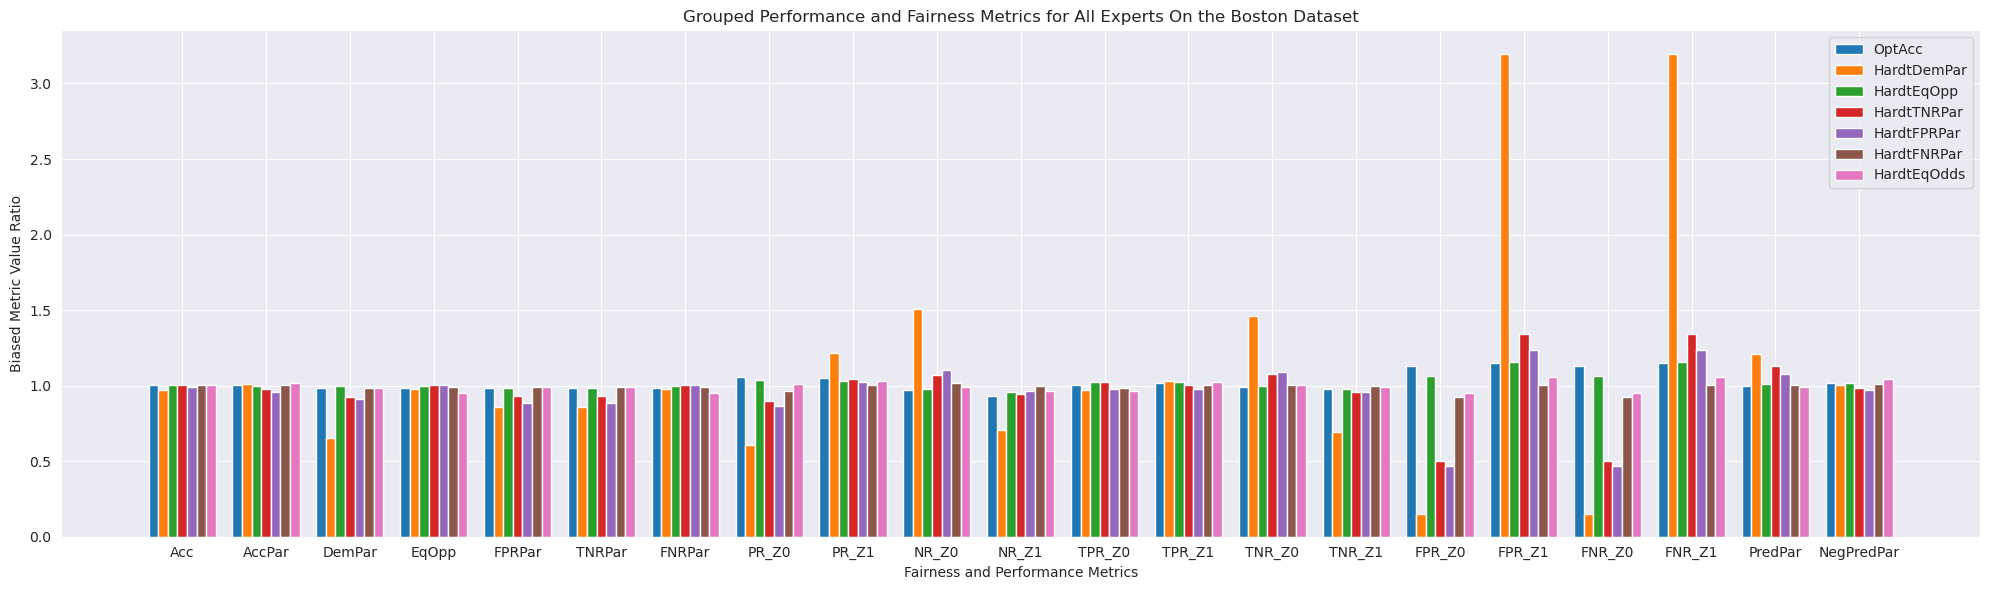

INFO:root:EXPERIMENT 1/7
INFO:root:For dataset: Adult and expert algo: OptAcc:
INFO:root:Feature expectations with no bias: [[0.79555215 0.94545505 0.84074503 0.80070307 0.9157714  0.9157714  0.80070307 0.12472648 0.28398145 0.87527352 0.71601855 0.41758242 0.61687935 0.94808743 0.86385884 0.05191257 0.13614116 0.05191257 0.13614116 0.99863903 0.96795092]]
INFO:root:Feature expectations with redlining: [[0.79233129 0.94939561 0.83461673 0.77132118 0.91944507 0.91944507 0.77132118 0.11823204 0.28361532 0.88176796 0.71638468 0.38176638 0.61044521 0.94516792 0.864613   0.05483208 0.135387   0.05483208 0.135387   0.95458267 0.96629431]]
INFO:root:EXPERIMENT 2/7
INFO:root:For dataset: Adult and expert algo: HardtDemPar:
INFO:root:Feature expectations with no bias: [[0.77684049 0.96806448 0.98449344 0.93572128 0.9391069  0.9391069  0.93572128 0.26392504 0.2794316  0.73607496 0.7205684  0.53421053 0.59848925 0.8027255  0.8636186  0.1972745  0.1363814  0.1972745  0.1363814  0.73737549 0.952685

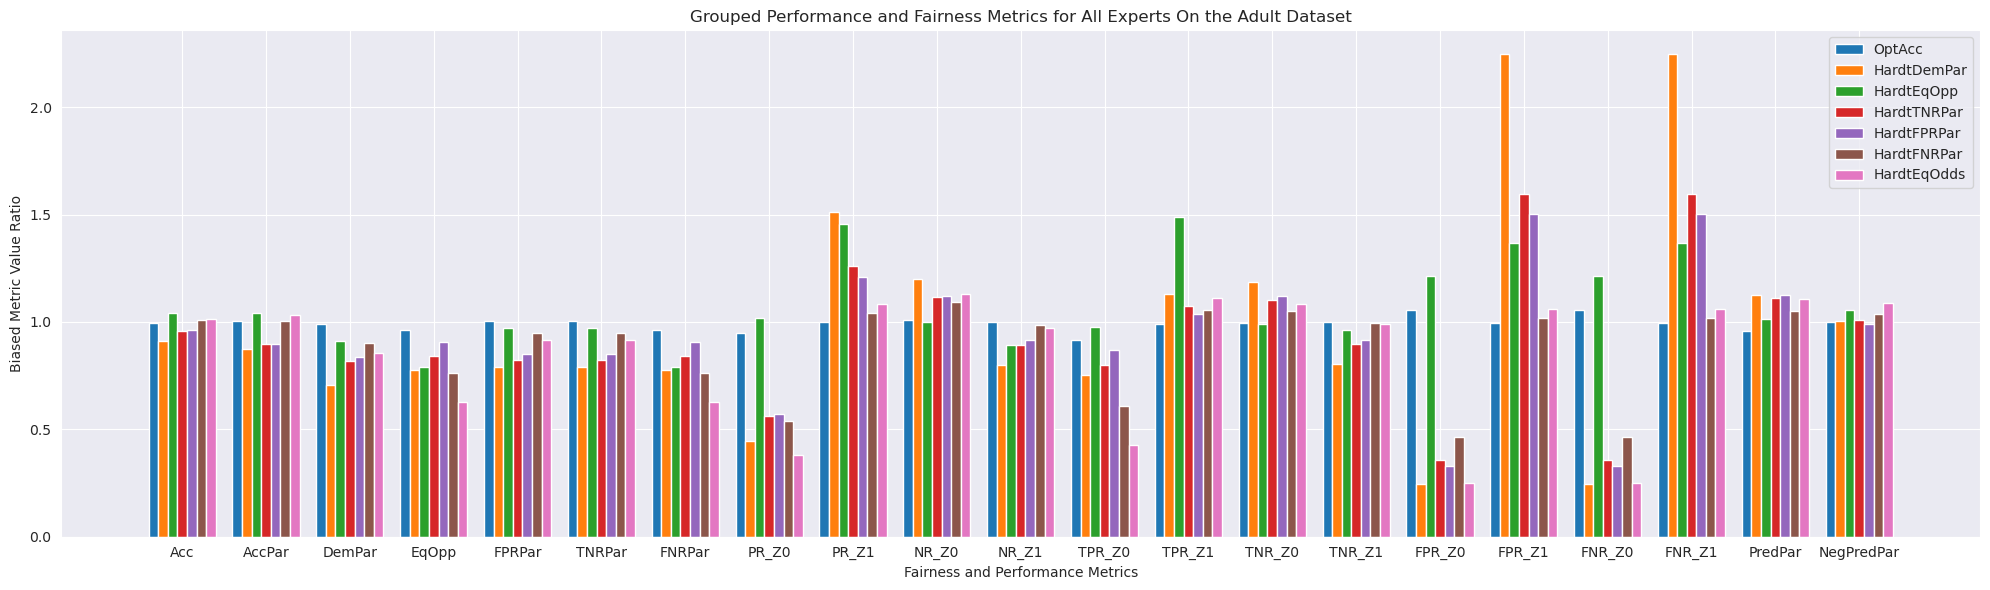

INFO:root:EXPERIMENT 1/7
INFO:root:For dataset: ACSIncome__MA and expert algo: OptAcc:
INFO:root:Feature expectations with no bias: [[0.66769032 0.99090772 0.70208311 0.70013699 0.78744041 0.78744041 0.70013699 0.31898148 0.61689837 0.68101852 0.38310163 0.47133758 0.77120059 0.768      0.55544041 0.232      0.44455959 0.232      0.44455959 0.87743231 0.9670175 ]]
INFO:root:Feature expectations with redlining: [[0.66809439 0.99019887 0.69933205 0.72189871 0.75688964 0.75688964 0.72189871 0.39385207 0.69452002 0.60614793 0.30547998 0.56947891 0.8475802  0.71708464 0.47397428 0.28291536 0.52602572 0.28291536 0.52602572 0.92027652 0.98649   ]]
INFO:root:EXPERIMENT 2/7
INFO:root:For dataset: ACSIncome__MA and expert algo: HardtDemPar:
INFO:root:Feature expectations with no bias: [[0.65194889 0.82514812 0.99880065 0.89077696 0.85290083 0.85290083 0.89077696 0.68205868 0.68085934 0.31794132 0.31914066 0.73501199 0.84423503 0.35341365 0.50051282 0.64658635 0.49948718 0.64658635 0.49948718 0.7

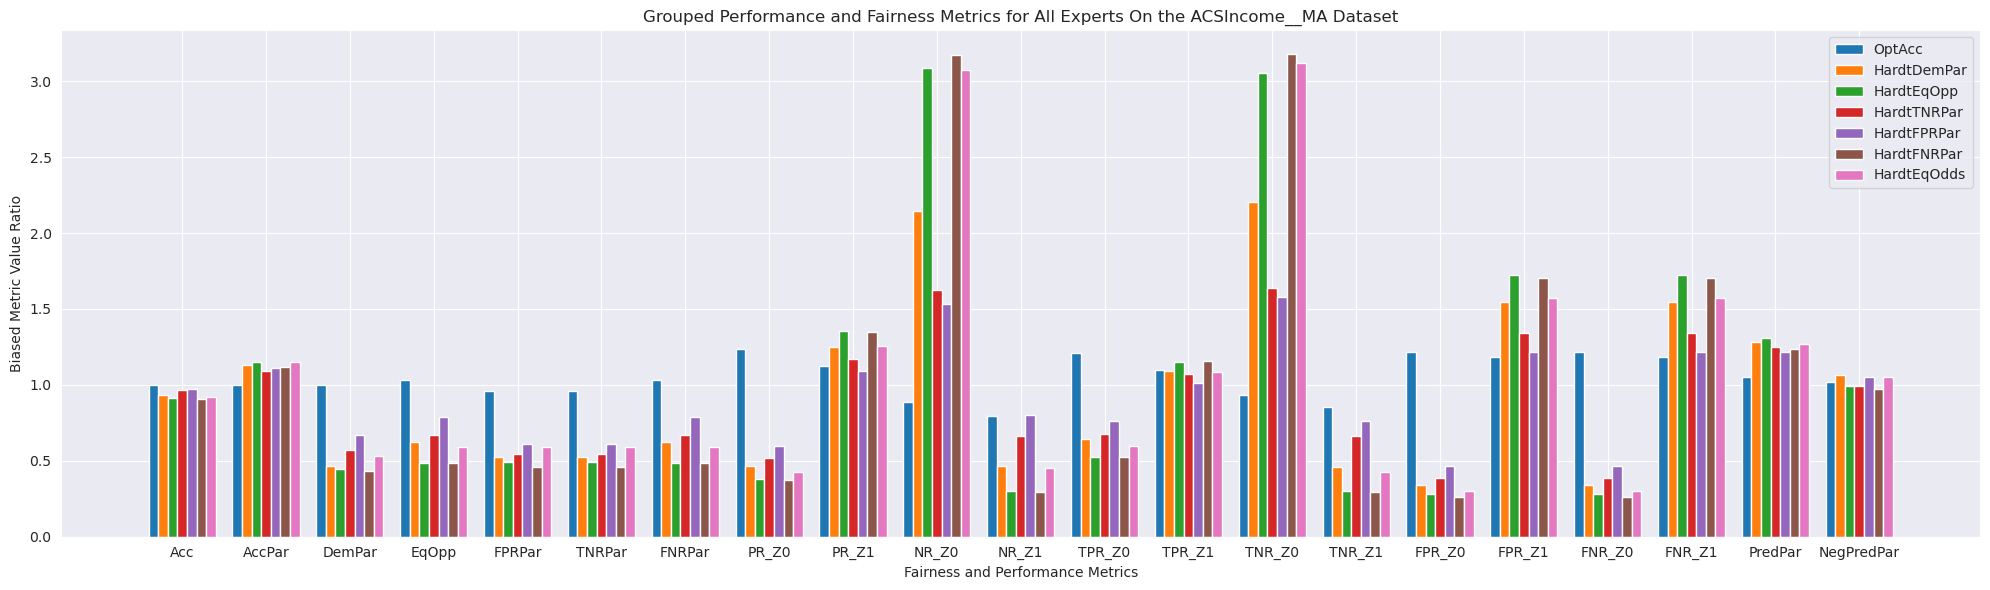

INFO:root:EXPERIMENT 1/7
INFO:root:For dataset: ACSIncome__MS and expert algo: OptAcc:
INFO:root:Feature expectations with no bias: [[0.695355   0.98083465 0.49899159 0.52148317 0.59542486 0.59542486 0.52148317 0.18816459 0.68917299 0.81183541 0.31082701 0.35575679 0.83427362 0.90503597 0.50046083 0.09496403 0.49953917 0.09496403 0.49953917 0.98987857 0.98154253]]
INFO:root:Feature expectations with redlining: [[0.70093458 0.99041269 0.58541532 0.61176258 0.694566   0.694566   0.61176258 0.23446602 0.64905069 0.76553398 0.35094931 0.41678322 0.80502063 0.86245353 0.55701954 0.13754647 0.44298046 0.13754647 0.44298046 0.91100618 0.94819634]]
INFO:root:EXPERIMENT 2/7
INFO:root:For dataset: ACSIncome__MS and expert algo: HardtDemPar:
INFO:root:Feature expectations with no bias: [[0.62034424 0.79721477 0.99578626 0.91647249 0.84141111 0.84141111 0.91647249 0.68465116 0.68043742 0.31534884 0.31956258 0.73719677 0.82072427 0.34303977 0.50162866 0.65696023 0.49837134 0.65696023 0.49837134 0.6

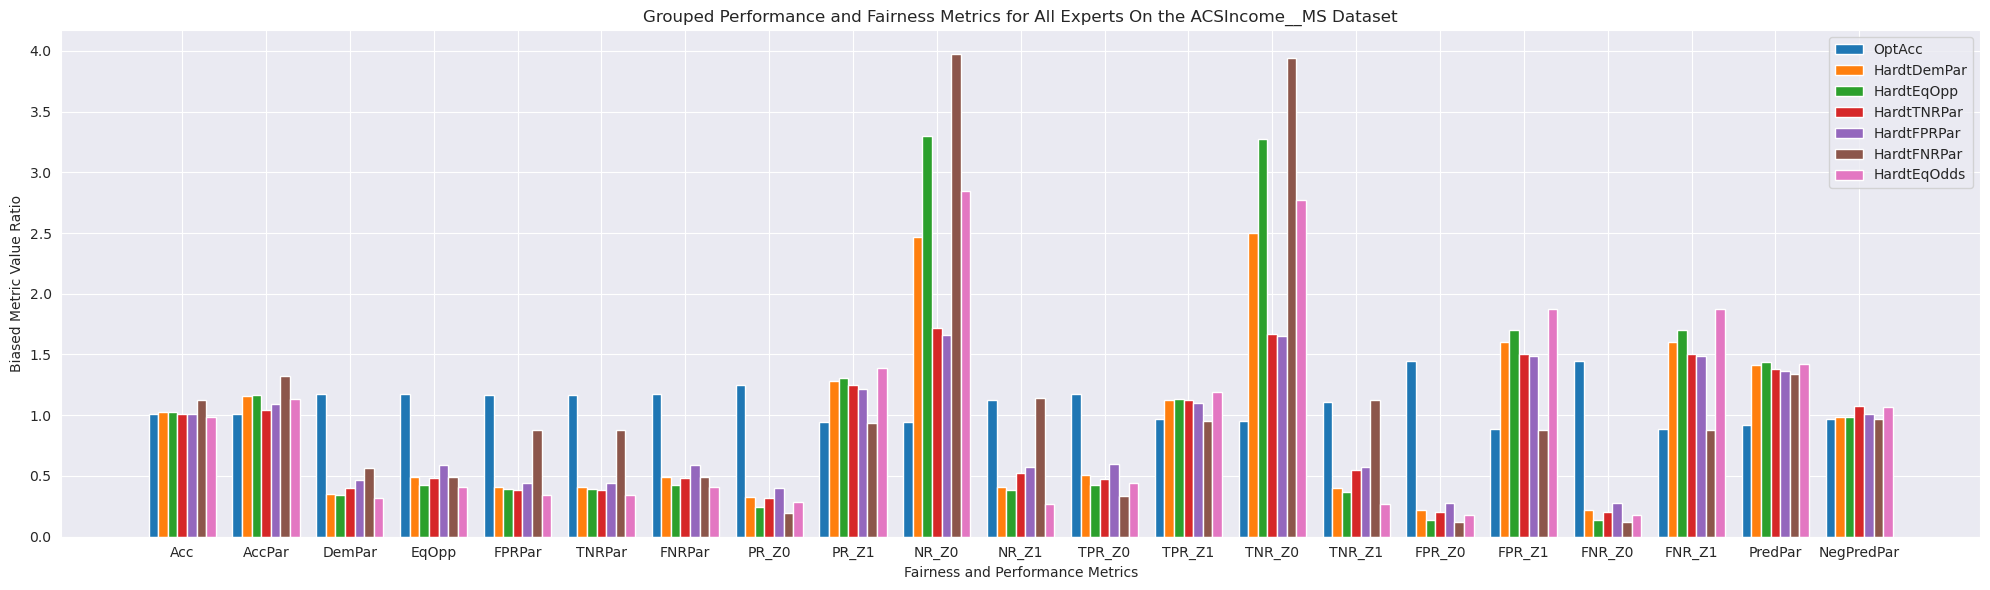

In [36]:
for exp_dict in exp_list:
    base_exp_info = exp_dict["base_exp_info"]
    source_states = exp_dict["source_states"]
    target_states = exp_dict["target_states"]
    exp_info = dict(base_exp_info)
    experiments = []
    for expert_algo in expert_algos:
        for source_dataset in source_states:
            for target_dataset in target_states:
                experiments.append({
                    'EXPERT_ALGO': expert_algo,
                    'IRL_METHOD': 'FairIRL',
                    'DATASET': source_dataset,
                    'TARGET_DATASET': target_dataset,
                })
    uE_ratio_list = []
    for exp_i, experiment in enumerate(experiments):
        # logging.info('\n\n')
        logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
        
        exp_info = dict(base_exp_info)
        
        for k in experiment:
            exp_info[k] = experiment[k]
            
        source_X, source_y, source_feature_types = generate_dataset(
            experiment['DATASET'],
            n_samples=exp_info['N_DATASET_SAMPLES'],
        )

        target_X, target_y, target_feature_types = generate_dataset(
            experiment['TARGET_DATASET'],
            n_samples=exp_info['N_DATASET_SAMPLES'],
        )

        for f in source_feature_types['categoric']:
            source_X[f] = source_X[f].astype(str)

        for f in target_feature_types['categoric']:
            target_X[f] = target_X[f].astype(str)
                    
        source_X_cols = (
            source_feature_types['boolean']
            + source_feature_types['categoric']
            + source_feature_types['continuous']
        )
        
        if exp_info['USE_HIDDEN_FEATURES_SOURCE']:
            source_X_cols += source_feature_types['hidden']
        _source_X = source_X[source_X_cols]
        
        
        target_X_cols = (
            target_feature_types['boolean']
            + target_feature_types['categoric']
            + target_feature_types['continuous']
        )
        if exp_info['USE_HIDDEN_FEATURES_TARGET']:
            target_X_cols += target_feature_types['hidden']
        _target_X = target_X[target_X_cols]
        
        logging.info(f"For dataset: {experiment['DATASET']} and expert algo: {experiment['EXPERT_ALGO']}:")
        
        unfairness_types = []
        uE_all = compute_feat_exp(ALL_FEAT_PERF_OBJECTIVE_NAMES, exp_info, source_X, source_y, source_feature_types, unfairness_types)
        unfairness_types = ["threshold_swapping"]
        # unfairness_types = ["redlining"]
        uE_all_biased = compute_feat_exp(ALL_FEAT_PERF_OBJECTIVE_NAMES, exp_info, source_X, source_y, source_feature_types, unfairness_types)
        uE_ratio = uE_all_biased / uE_all
        uE_ratio_list.append(uE_ratio[0])

        logging.info(f"Feature expectations with no bias: {uE_all}")
        logging.info(f"Feature expectations with redlining: {uE_all_biased}")

    fig, ax = plt.subplots(figsize=(20, 6))

    # Number of arrays and number of values per array
    num_arrays = len(uE_ratio_list)
    array_length = len(uE_ratio_list[0])

    # X locations for the clusters
    indices = np.arange(array_length)

    # Width of each bar
    bar_width = 0.8 / num_arrays  # 0.8 so there's some space between clusters

    for i, arr in enumerate(uE_ratio_list):
        # Offset each array's bars so they appear side by side in each cluster
        ax.bar(indices + i * bar_width, arr, width=bar_width, label=expert_algos[i])

    ax.set_xlabel("Fairness and Performance Metrics")
    ax.set_ylabel("Biased Metric Value Ratio")
    ax.set_title(f'Grouped Performance and Fairness Metrics for All Experts On the {source_states[0]} Dataset')
    ax.set_xticks(indices + bar_width * (num_arrays - 1) / 2)
    ax.set_xticklabels(ALL_FEAT_PERF_OBJECTIVE_NAMES)
    ax.legend()

    plt.tight_layout()
    plt.show()